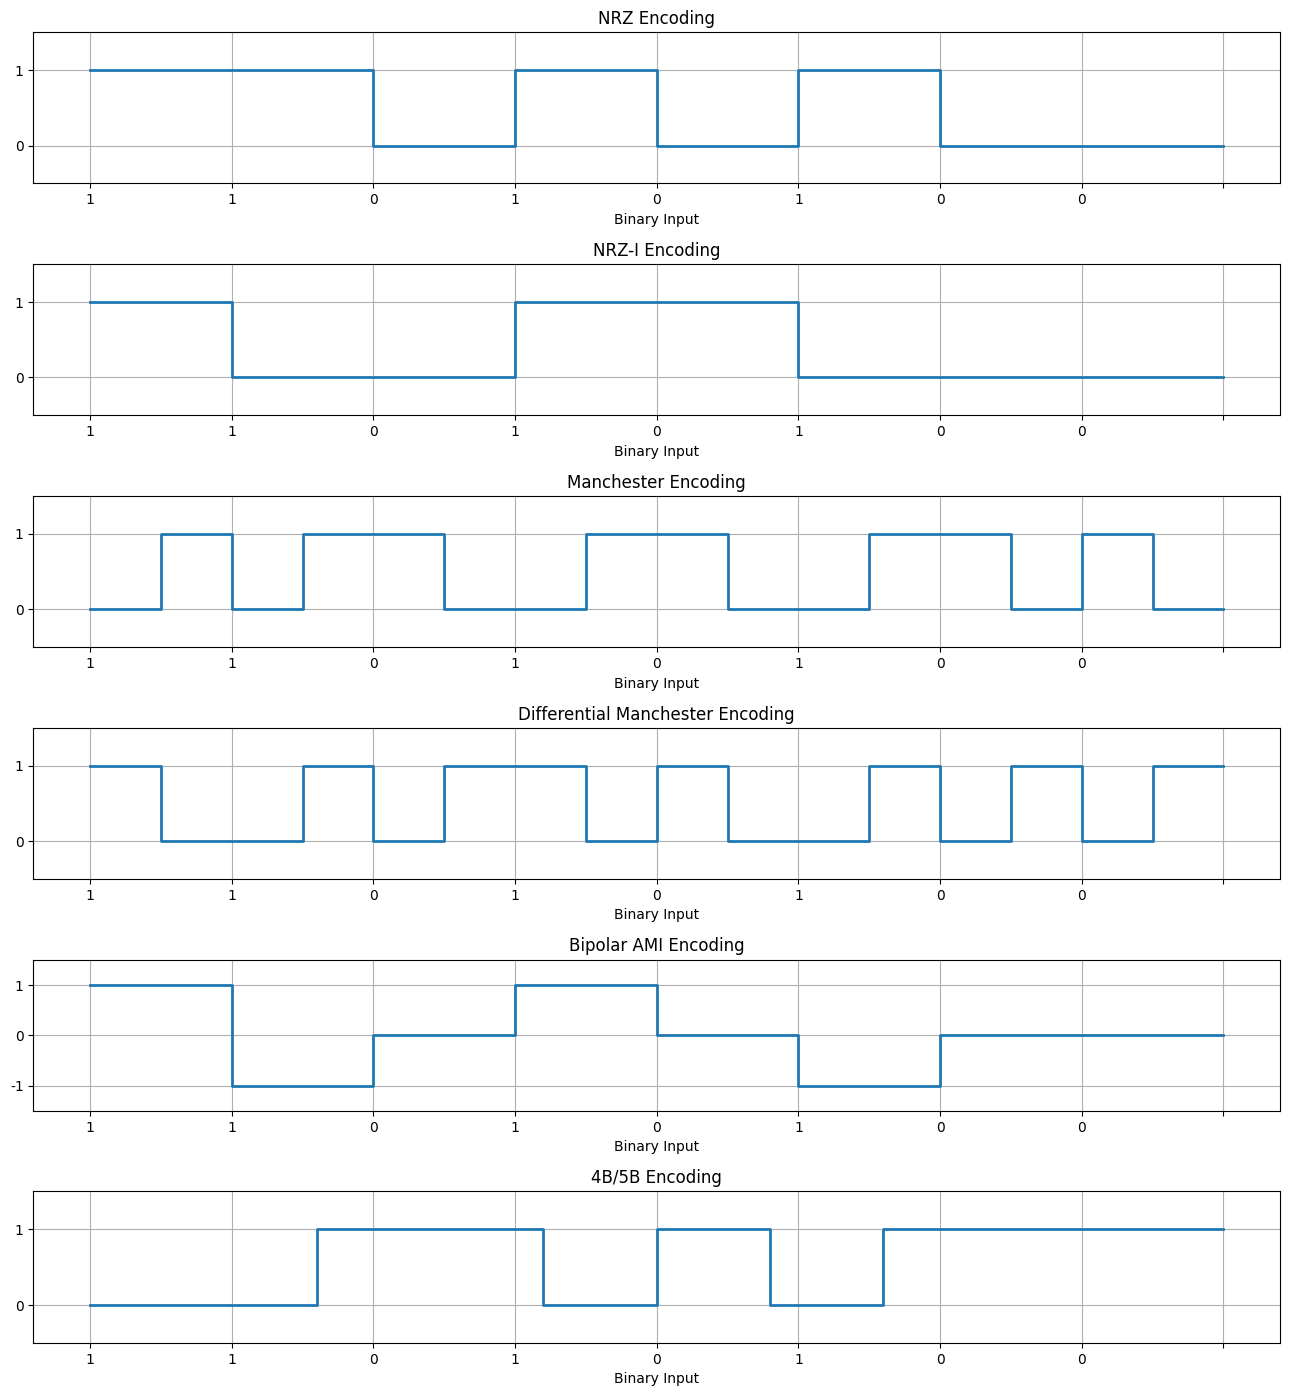

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Binary input
binary_input = "11010100"

# Convert binary string to an array of integers (0 and 1)
binary_input_array = np.array([int(bit) for bit in binary_input])

# NRZ-L Encoding
nrz_l = np.where(binary_input_array == 1, 1, 0)

# NRZ-I Encoding
nrz_i = np.zeros(len(binary_input))
current_level = 0
for i, bit in enumerate(binary_input):
    if bit == '1':
        current_level = 1 - current_level  # Flip the level for '1'
    nrz_i[i] = current_level

# Manchester Encoding
manchester = np.zeros(2 * len(binary_input))
for i, bit in enumerate(binary_input):
    if bit == '1':
        manchester[2*i] = 0  # First half low
        manchester[2*i + 1] = 1  # Second half high
    else:
        manchester[2*i] = 1  # First half high
        manchester[2*i + 1] = 0  # Second half low

# Differential Manchester Encoding
diff_manchester = np.zeros(2 * len(binary_input))
last_level = 1  # Start with a high level
for i, bit in enumerate(binary_input):
    if bit == '0':
        last_level = 1 - last_level  # Transition at the start of the bit period
    diff_manchester[2*i] = last_level
    last_level = 1 - last_level  # Transition in the middle of the bit period
    diff_manchester[2*i + 1] = last_level

# Bipolar AMI Encoding
bipolar_ami = np.zeros(len(binary_input))
last_nonzero = -1
for i, bit in enumerate(binary_input):
    if bit == '1':
        last_nonzero = -last_nonzero  # Alternate between +1 and -1
        bipolar_ami[i] = last_nonzero
    else:
        bipolar_ami[i] = 0  # Binary 0 is represented by 0

# 4B/5B Encoding
def encode_4b5b(data):
    encoding = {
        '0000': '11110', '0001': '11101', '0010': '11011', '0011': '11010',
        '0100': '10111', '0101': '10110', '0110': '10011', '0111': '10010',
        '1000': '01111', '1001': '01110', '1010': '01011', '1011': '01010',
        '1100': '00111', '1101': '00110', '1110': '00011', '1111': '00010'
    }
    encoded = ''.join(encoding[data[i:i+4]] for i in range(0, len(data), 4))
    return np.array([int(bit) for bit in encoded])

# Binary input for 4B/5B encoding
binary_input_4b5b = ''.join(binary_input[i:i+4] for i in range(0, len(binary_input), 4))
encoded_4b5b = encode_4b5b(binary_input_4b5b)

# Plotting the time-domain graphs and combined PSD
plt.figure(figsize=(13, 25))  # Increase figure size slightly

# NRZ-L Plot
plt.subplot(11, 1, 2)
plt.step(np.arange(len(binary_input)+1), np.append(nrz_l, nrz_l[-1]), where='post', linewidth=2)
plt.ylim([-0.5, 1.5])
plt.yticks([0, 1], ['0', '1'])
plt.xticks(range(len(binary_input)+1), list(binary_input) + [''])
plt.grid(True)
plt.title('NRZ Encoding')
plt.xlabel('Binary Input')

# NRZ-I Plot
plt.subplot(11, 1, 3)
plt.step(np.arange(len(binary_input)+1), np.append(nrz_i, nrz_i[-1]), where='post', linewidth=2)
plt.ylim([-0.5, 1.5])
plt.yticks([0, 1], ['0', '1'])
plt.xticks(range(len(binary_input)+1), list(binary_input) + [''])
plt.grid(True)
plt.title('NRZ-I Encoding')
plt.xlabel('Binary Input')

# Manchester Plot
plt.subplot(11, 1, 4)
plt.step(np.arange(0, len(binary_input) + 0.5, 0.5), np.append(manchester, manchester[-1]), where='post', linewidth=2)
plt.ylim([-0.5, 1.5])
plt.yticks([0, 1], ['0', '1'])
plt.xticks(np.arange(0, len(binary_input)+1), list(binary_input) + [''])
plt.grid(True)
plt.title('Manchester Encoding')
plt.xlabel('Binary Input')

# Differential Manchester Plot
plt.subplot(11, 1, 5)
plt.step(np.arange(0, len(binary_input) + 0.5, 0.5), np.append(diff_manchester, diff_manchester[-1]), where='post', linewidth=2)
plt.ylim([-0.5, 1.5])
plt.yticks([0, 1], ['0', '1'])
plt.xticks(np.arange(0, len(binary_input)+1), list(binary_input) + [''])
plt.grid(True)
plt.title('Differential Manchester Encoding')
plt.xlabel('Binary Input')

# Bipolar AMI Plot
plt.subplot(11, 1, 6)
plt.step(np.arange(len(binary_input)+1), np.append(bipolar_ami, bipolar_ami[-1]), where='post', linewidth=2)
plt.ylim([-1.5, 1.5])
plt.yticks([-1, 0, 1], ['-1', '0', '1'])
plt.xticks(range(len(binary_input)+1), list(binary_input) + [''])
plt.grid(True)
plt.title('Bipolar AMI Encoding')
plt.xlabel('Binary Input')

# 4B/5B Plot
plt.subplot(11, 1, 7)
plt.step(np.arange(0, len(encoded_4b5b)+1), np.append(encoded_4b5b, encoded_4b5b[-1]), where='post', linewidth=2)
plt.ylim([-0.5, 1.5])
plt.yticks([0, 1], ['0', '1'])
plt.xticks(np.arange(0, len(encoded_4b5b)+1, 5/4), list(binary_input_4b5b) + [''])
plt.grid(True)
plt.title('4B/5B Encoding')
plt.xlabel('Binary Input')

plt.tight_layout()
plt.show()


In [ ]:
def bit_stuffing(bit_sequence):
    stuffed_sequence = []
    count = 0

  # Iterate over each bit in the input sequence
    for bit in bit_sequence:
        if bit == '1':
            count += 1  # Increment the count if the bit is '1'
        else:
            count = 0   # Reset count if bit is '0'

        stuffed_sequence.append(bit)

        # Insert a '0' after five consecutive '1's
        if count == 5:
            stuffed_sequence.append('0')
            count = 0

    return ''.join(stuffed_sequence)

# Define the bit sequence
bit_sequence = '0111110011111000110000'

# Apply bit stuffing
stuffed_sequence = bit_stuffing(bit_sequence)

print(f"Original bit sequence: {bit_sequence}")
print(f"Stuffed bit sequence: {stuffed_sequence}")


Original bit sequence: 0111110011111000110000
Stuffed bit sequence: 011111000111110000110000


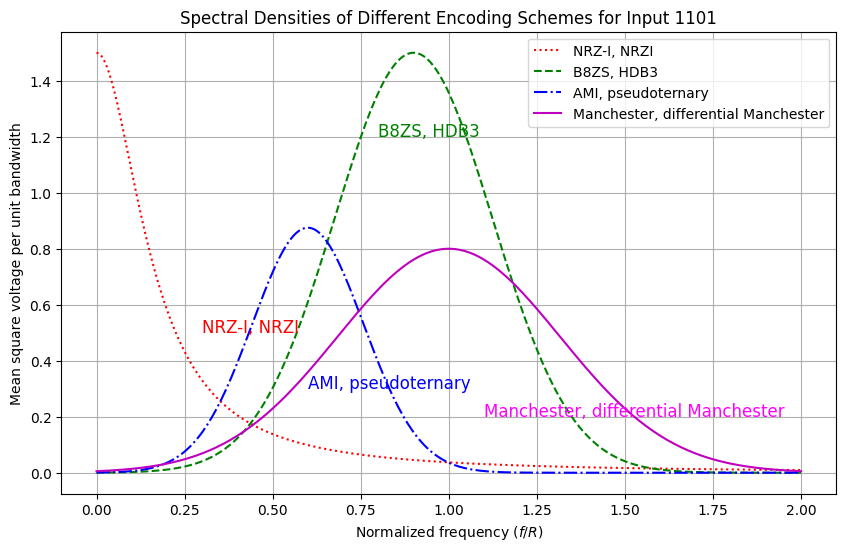

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Input bits
binary_input = "11010100"

# Define normalized frequency range
fR = np.linspace(0, 2, 300)

# Generate arbitrary data to simulate the curves based on input bits
def nrzi_spectral_density(fR, bits):
    # Example: NRZI influenced by the number of transitions
    transitions = sum(1 for i in range(1, len(bits)) if bits[i] != bits[i-1])
    return 1 / (1 + (2 * np.pi * fR)**2) * (1 + transitions / len(bits))

def b8zs_hdb3_spectral_density(fR, bits):
    # Example: B8ZS/HDB3 influenced by the number of consecutive zeros
    consecutive_zeros = max([len(seq) for seq in bits.split('1')])
    return 1.2 * np.exp(-((fR - 0.9)**2) / 0.1) * (1 + consecutive_zeros / len(bits))

def ami_pseudoternary_spectral_density(fR, bits):
    # Example: AMI/Pseudoternary influenced by the number of ones
    ones = bits.count('1')
    return 0.5 * np.exp(-((fR - 0.6)**2) / 0.05) * (1 + ones / len(bits))

def manchester_spectral_density(fR, bits):
    # Example: Manchester influenced by the total number of bits
    return 0.2 * np.exp(-((fR - 1)**2) / 0.2) * len(bits)

# Plotting the spectral densities with different colors
plt.figure(figsize=(10, 6))
plt.plot(fR, nrzi_spectral_density(fR, binary_input), 'r:', label='NRZ-I, NRZI')      # Red dotted line
plt.plot(fR, b8zs_hdb3_spectral_density(fR, binary_input), 'g--', label='B8ZS, HDB3')  # Green dashed line
plt.plot(fR, ami_pseudoternary_spectral_density(fR, binary_input), 'b-.', label='AMI, pseudoternary')  # Blue dash-dot line
plt.plot(fR, manchester_spectral_density(fR, binary_input), 'm-', label='Manchester, differential Manchester')  # Magenta solid line

# Adding labels and title
plt.xlabel('Normalized frequency ($f/R$)')
plt.ylabel('Mean square voltage per unit bandwidth')
plt.title(f'Spectral Densities of Different Encoding Schemes for Input {binary_input}')
plt.legend()
plt.grid(True)

# Adding text annotations with corresponding colors
plt.text(0.3, 0.5, 'NRZ-I, NRZI', fontsize=12, color='red')
plt.text(0.8, 1.2, 'B8ZS, HDB3', fontsize=12, color='green')
plt.text(0.6, 0.3, 'AMI, pseudoternary', fontsize=12, color='blue')
plt.text(1.1, 0.2, 'Manchester, differential Manchester', fontsize=12, color='magenta')

# Show the plot
plt.show()
